<a href="https://colab.research.google.com/github/ChaitnyaAvasare/TSF/blob/main/FinalChaitanyaProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA MINING IN "FRAUD DETECTION IN SELF CHECKOUT SYSTEM"

#Understanding System

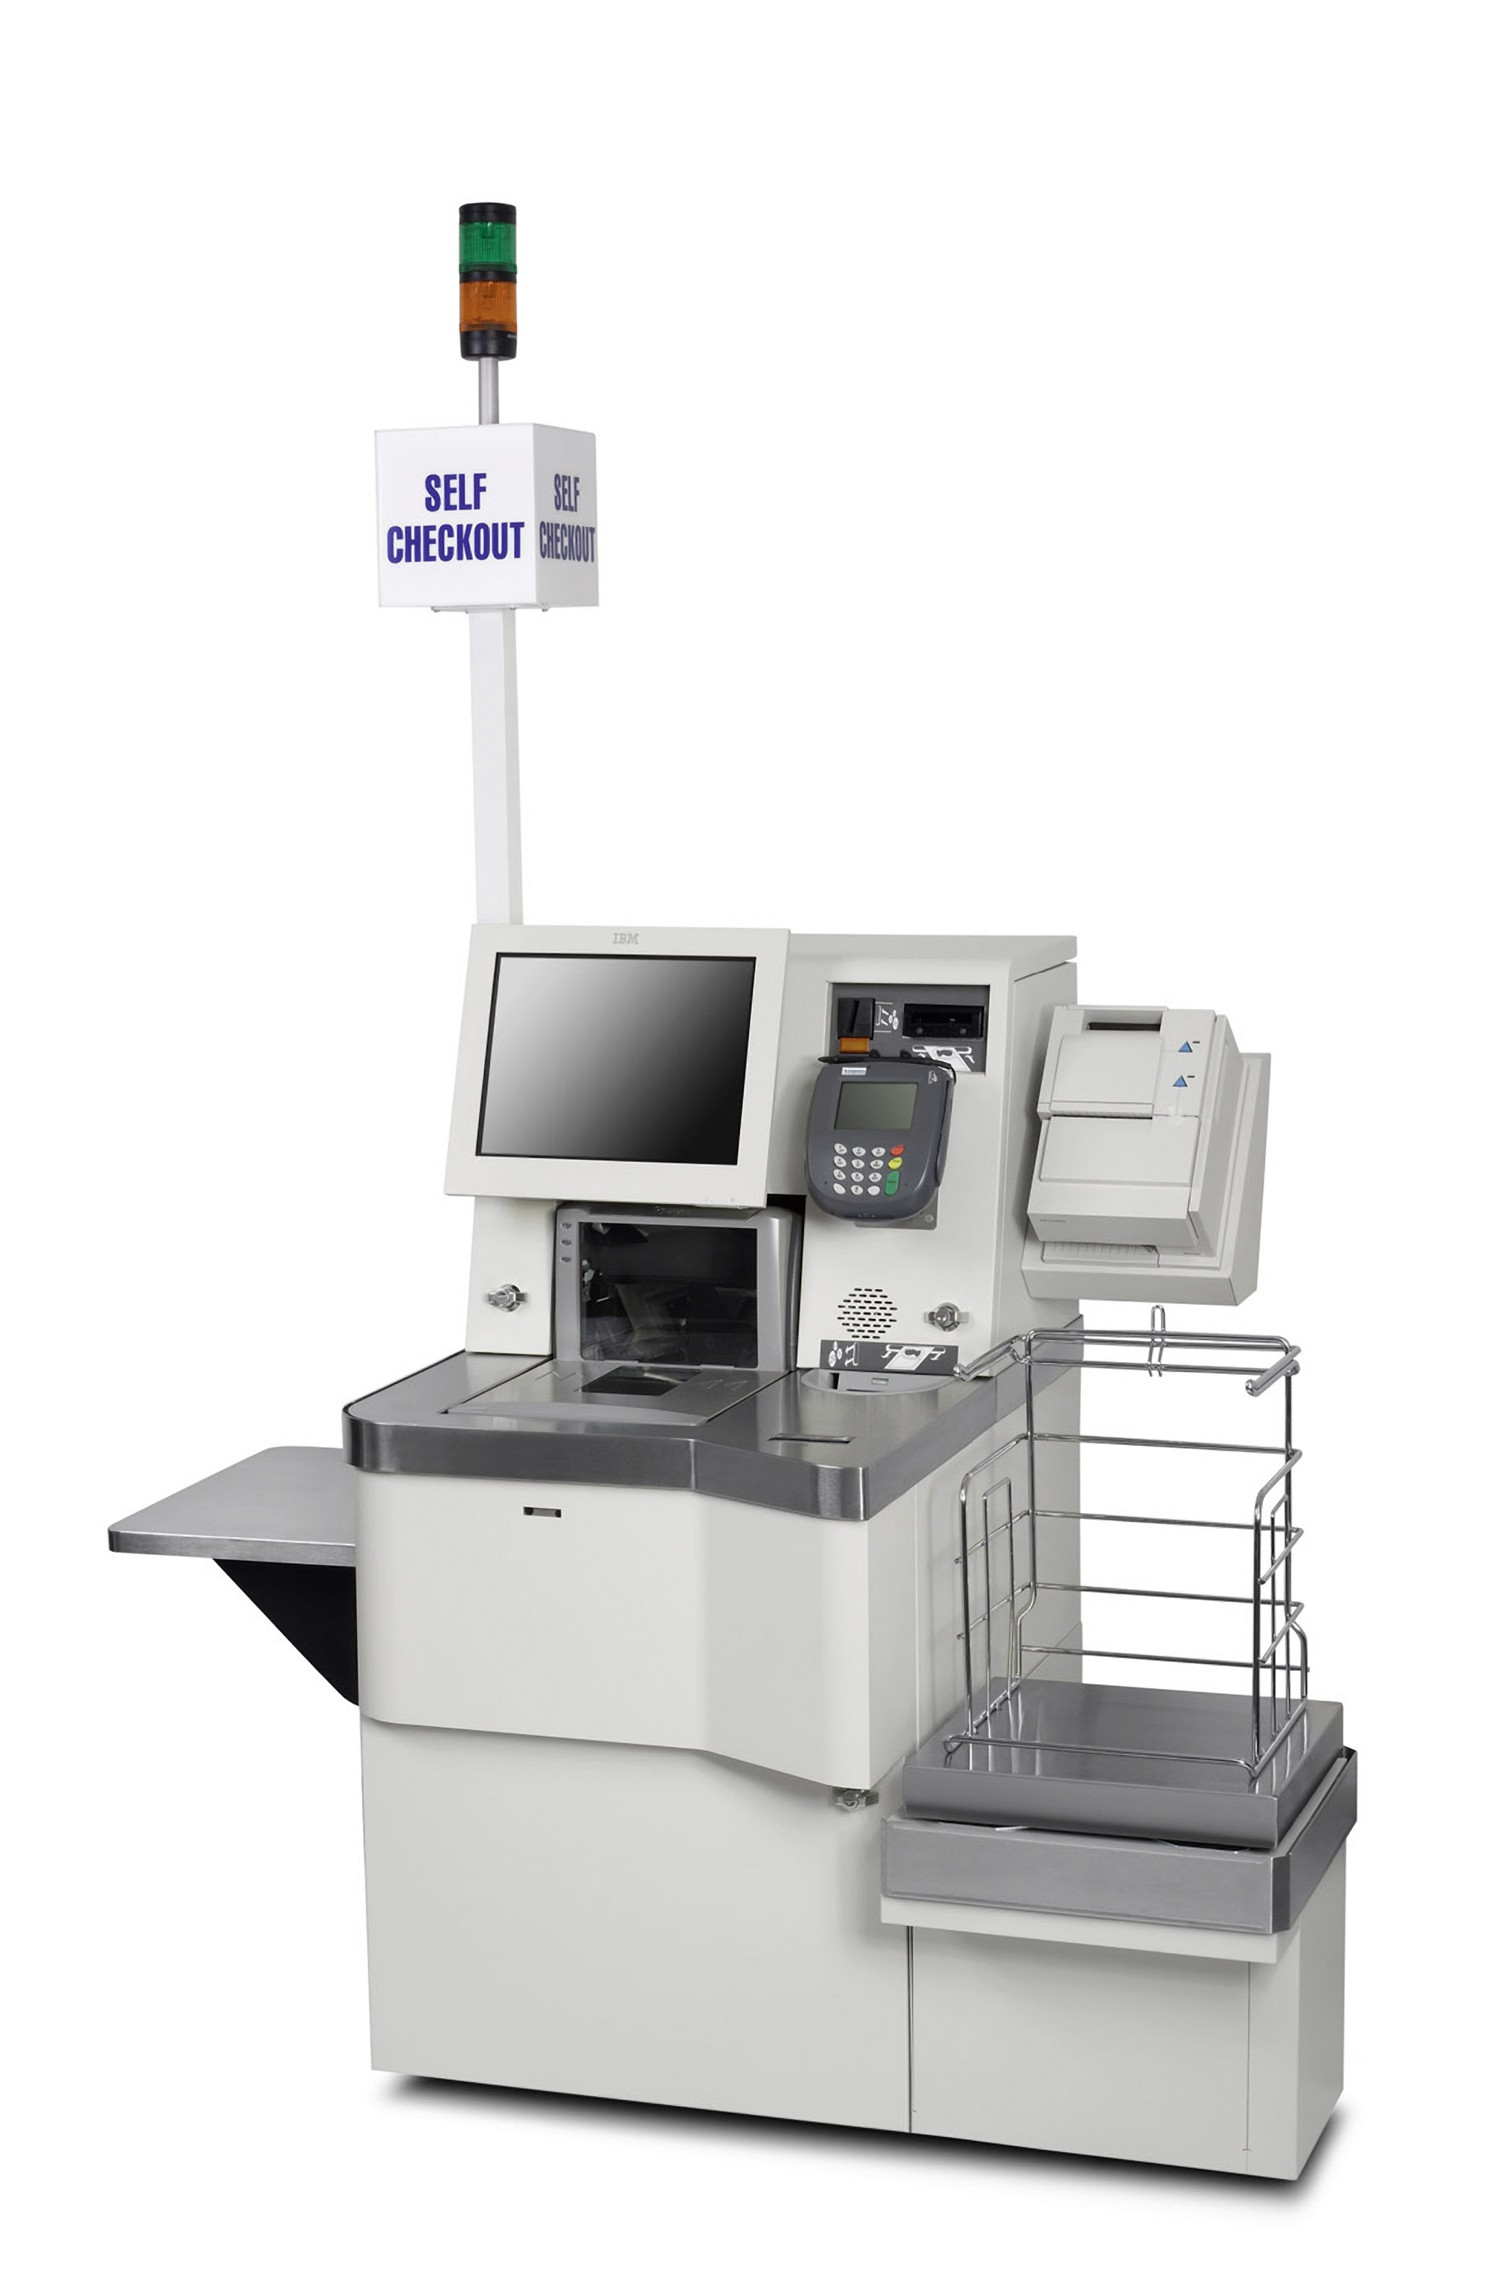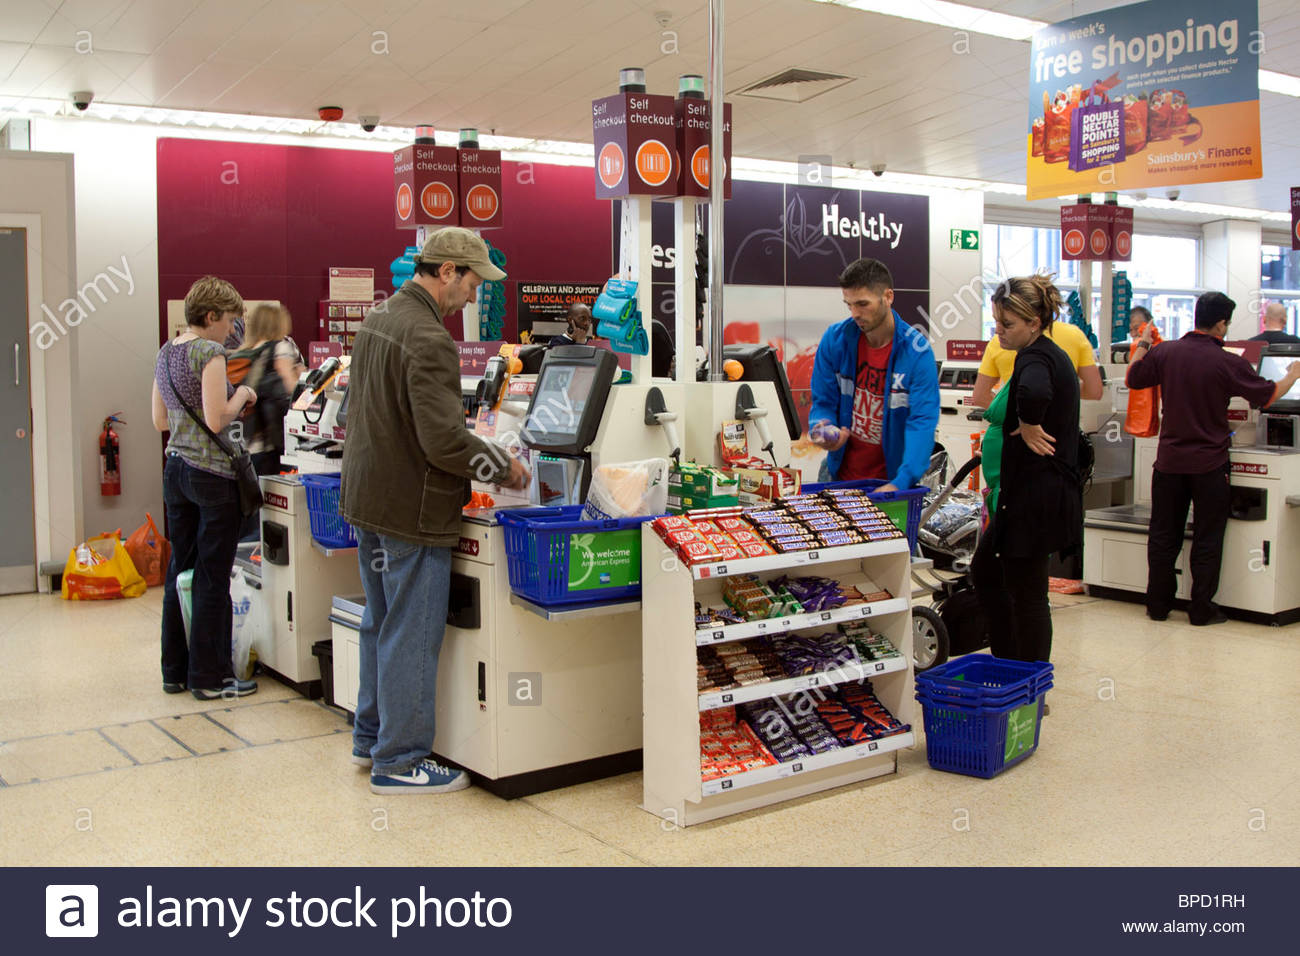

#1. Data Understanding

---



#2. Data Loading

In [1]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition|fraud\n5|1054|54.7|7|0|3|0.0275142314990512|0.0518975332068311|0.241379310344828|0\n3|108|27.36|5|2|4|0.12962962962963|0.253333333333333|0.357142857142857|0\n3|1516|62.16|3|10|5|0.00857519788918206|0.0410026385224274|0.230769230769231|0\n6|1791|92.31|8|4|4|0.0161920714684534|0.0515410385259632|0.275862068965517|0\n5|430|81.53|3|7|2|0.0627906976744186|0.189604651162791|0.111111111111111|0\n1|770|11.09|11|5|2|0.0337662337662338|0.0144025974025974|0.423076923076923|1\n3|294|55.63|2|7|1|0.0374149659863946|0.18921768707483|0.181818181818182|0\n2|1545|22.8|0|8|4|0.00647249190938511|0.0147572815533981|0|0\n6|962|65.44|7|0|2|0.0280665280665281|0.068024948024948|0.259259259259259|0\n2|725|41.08|10|2|4|0.0372413793103448|0.0566620689655172|0.37037037037037|0\n5|1533|84.73|4|2|4|0.0104370515329419|0.055270711024

In [2]:
import pandas as pd

df = pd.read_csv("train.csv", sep = '|' )



In [3]:
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [4]:
df.tail()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0
1878,4,1140,38.03,2,2,3,0.016667,0.033360,0.105263,0


#2. Perform EDA using following steps
---



In [5]:
df.columns

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud'],
      dtype='object')

In [18]:
df.shape

(1879, 10)

In [11]:
df.groupby('fraud').fraud.count()

fraud
0    1775
1     104
Name: fraud, dtype: int64

In [6]:
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


#3 Data cleaning and Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [13]:
print('Check if there are any columns with empty/null dataset ?')
print(df.isnull().sum())

Check if there are any columns with empty/null dataset ?
trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64


In [14]:
print('correlation between all predative features w.r.t "fraud" (target) feature')
cor = df.corr()['fraud']
print(cor)

correlation between all predative features w.r.t "fraud" (target) feature
trustLevel                  -0.319765
totalScanTimeInSeconds       0.110414
grandTotal                   0.001421
lineItemVoids                0.063496
scansWithoutRegistration     0.074123
quantityModifications       -0.000864
scannedLineItemsPerSecond   -0.023085
valuePerSecond              -0.028873
lineItemVoidsPerPosition    -0.090116
fraud                        1.000000
Name: fraud, dtype: float64


In [19]:
print('correlation between all predative features w.r.t trustLevel feature')
cor = df.corr()['trustLevel']
print(cor)

correlation between all predative features w.r.t trustLevel feature
trustLevel                   1.000000
totalScanTimeInSeconds       0.025264
grandTotal                   0.047656
lineItemVoids               -0.017312
scansWithoutRegistration     0.017296
quantityModifications        0.006506
scannedLineItemsPerSecond    0.030701
valuePerSecond               0.027626
lineItemVoidsPerPosition     0.009241
fraud                       -0.319765
Name: trustLevel, dtype: float64


heatmap of the correlation matrix 


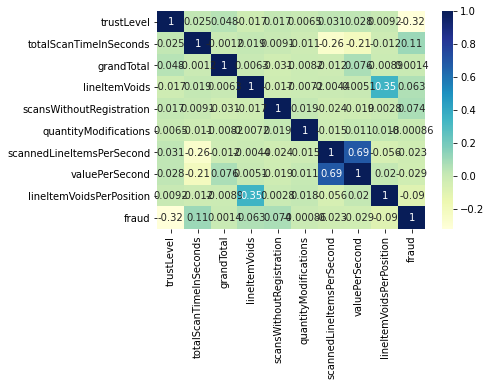

In [16]:
print('heatmap of the correlation matrix ')
import seaborn as sb 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) #rainbow

heatmap of the correlation matrix 


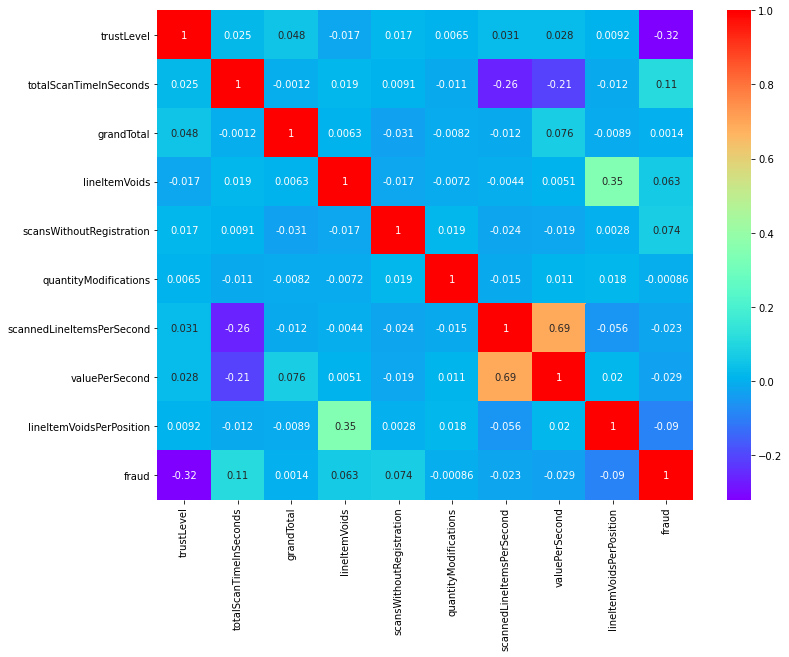

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
print('heatmap of the correlation matrix ')
import seaborn as sb 
dataplot = sb.heatmap(df.corr(), cmap="rainbow", annot=True)

# 4 Classification

In [20]:
#libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [24]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.
# To divide the data into attributes and labels, do :
X = df.drop('fraud', axis=1)  
y = df['fraud']  

# the final preprocessing step is to divide data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(X)
print('\n\n\n')
print(X_train)
print('\n\n\n')
print('\n\n\n')
print(y)
print('\n\n\n')
print(y_test)

      trustLevel  ...  lineItemVoidsPerPosition
0              5  ...                  0.241379
1              3  ...                  0.357143
2              3  ...                  0.230769
3              6  ...                  0.275862
4              5  ...                  0.111111
...          ...  ...                       ...
1874           1  ...                  0.347826
1875           1  ...                  0.192308
1876           4  ...                  0.166667
1877           2  ...                  0.041667
1878           4  ...                  0.105263

[1879 rows x 9 columns]




      trustLevel  ...  lineItemVoidsPerPosition
1706           1  ...                  0.500000
403            3  ...                  0.250000
1207           5  ...                  0.238095
1471           6  ...                  0.000000
790            6  ...                  0.571429
...          ...  ...                       ...
1269           2  ...                  0.111111
369        

In [26]:
dt = DecisionTreeClassifier()
dtree = dt.fit(X_train, y_train)

In [27]:
predictions = dt.predict(X_test)
print(accuracy_score(y_test, predictions))
print('\n\n\n')
print(confusion_matrix(y_test, predictions))
print('\n\n\n')
print(classification_report(y_test, predictions))

0.9521276595744681




[[348   8]
 [ 10  10]]




              precision    recall  f1-score   support

           0       0.97      0.98      0.97       356
           1       0.56      0.50      0.53        20

    accuracy                           0.95       376
   macro avg       0.76      0.74      0.75       376
weighted avg       0.95      0.95      0.95       376



In [28]:
col = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']

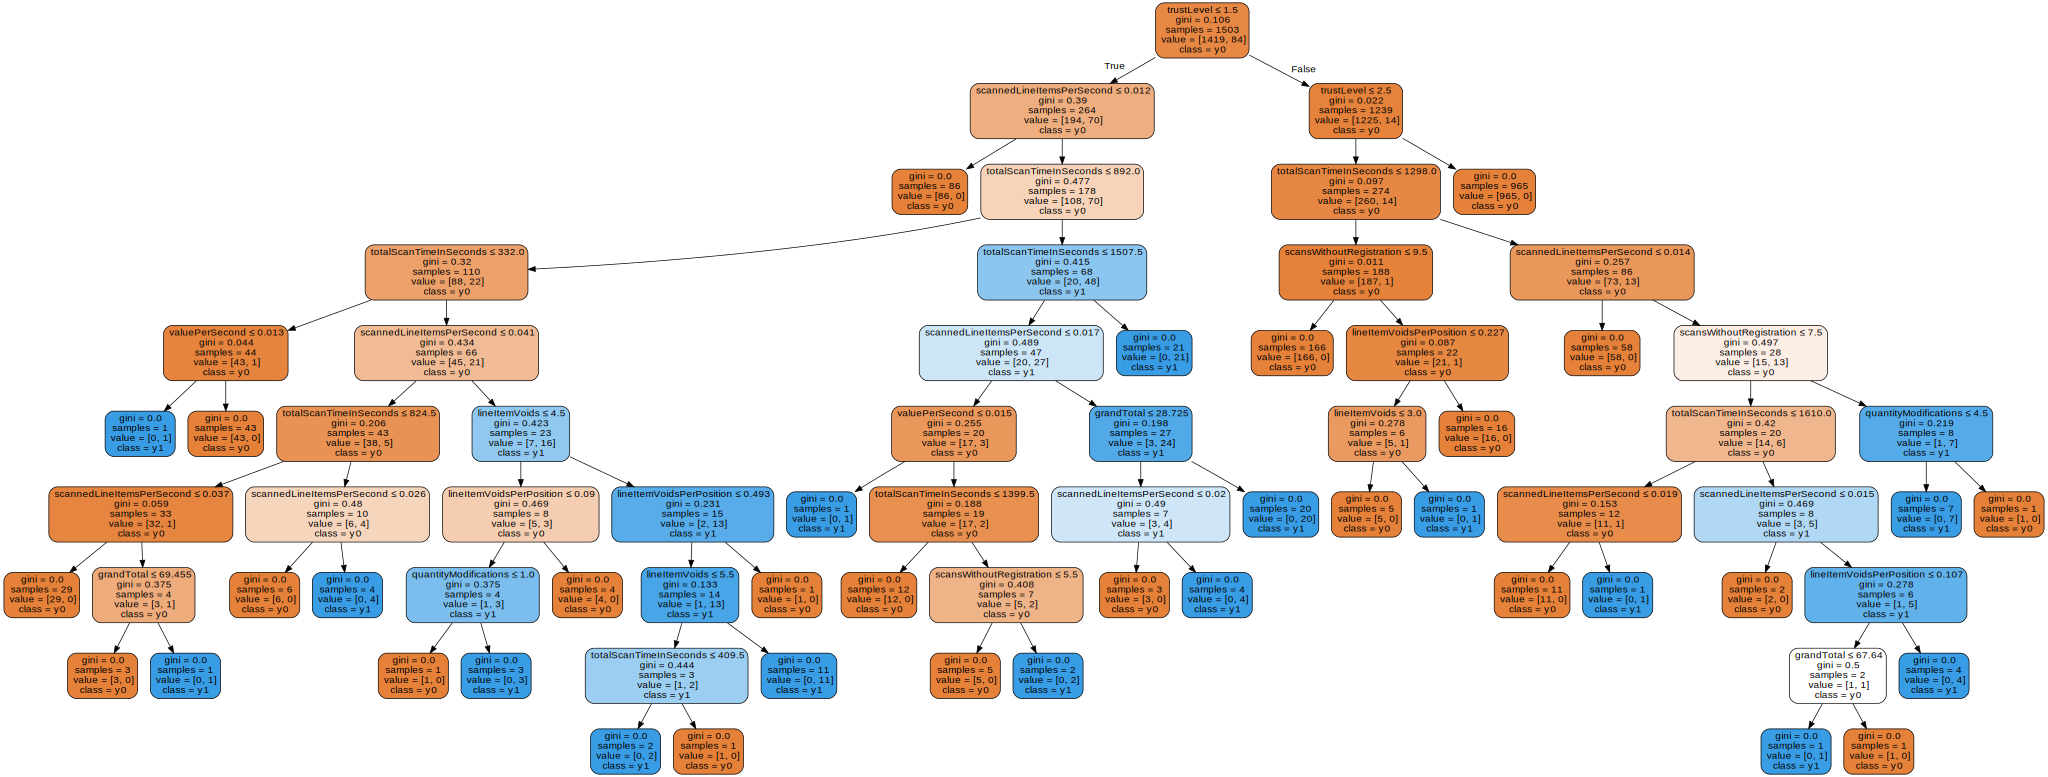

In [29]:
import graphviz 
from sklearn.tree import export_graphviz

feature_names = col

dot_data = export_graphviz(dtree, out_file=None, feature_names=col, class_names=True, filled=True, rounded=True,   special_characters=True)  
graph = graphviz.Source(dot_data)

graph

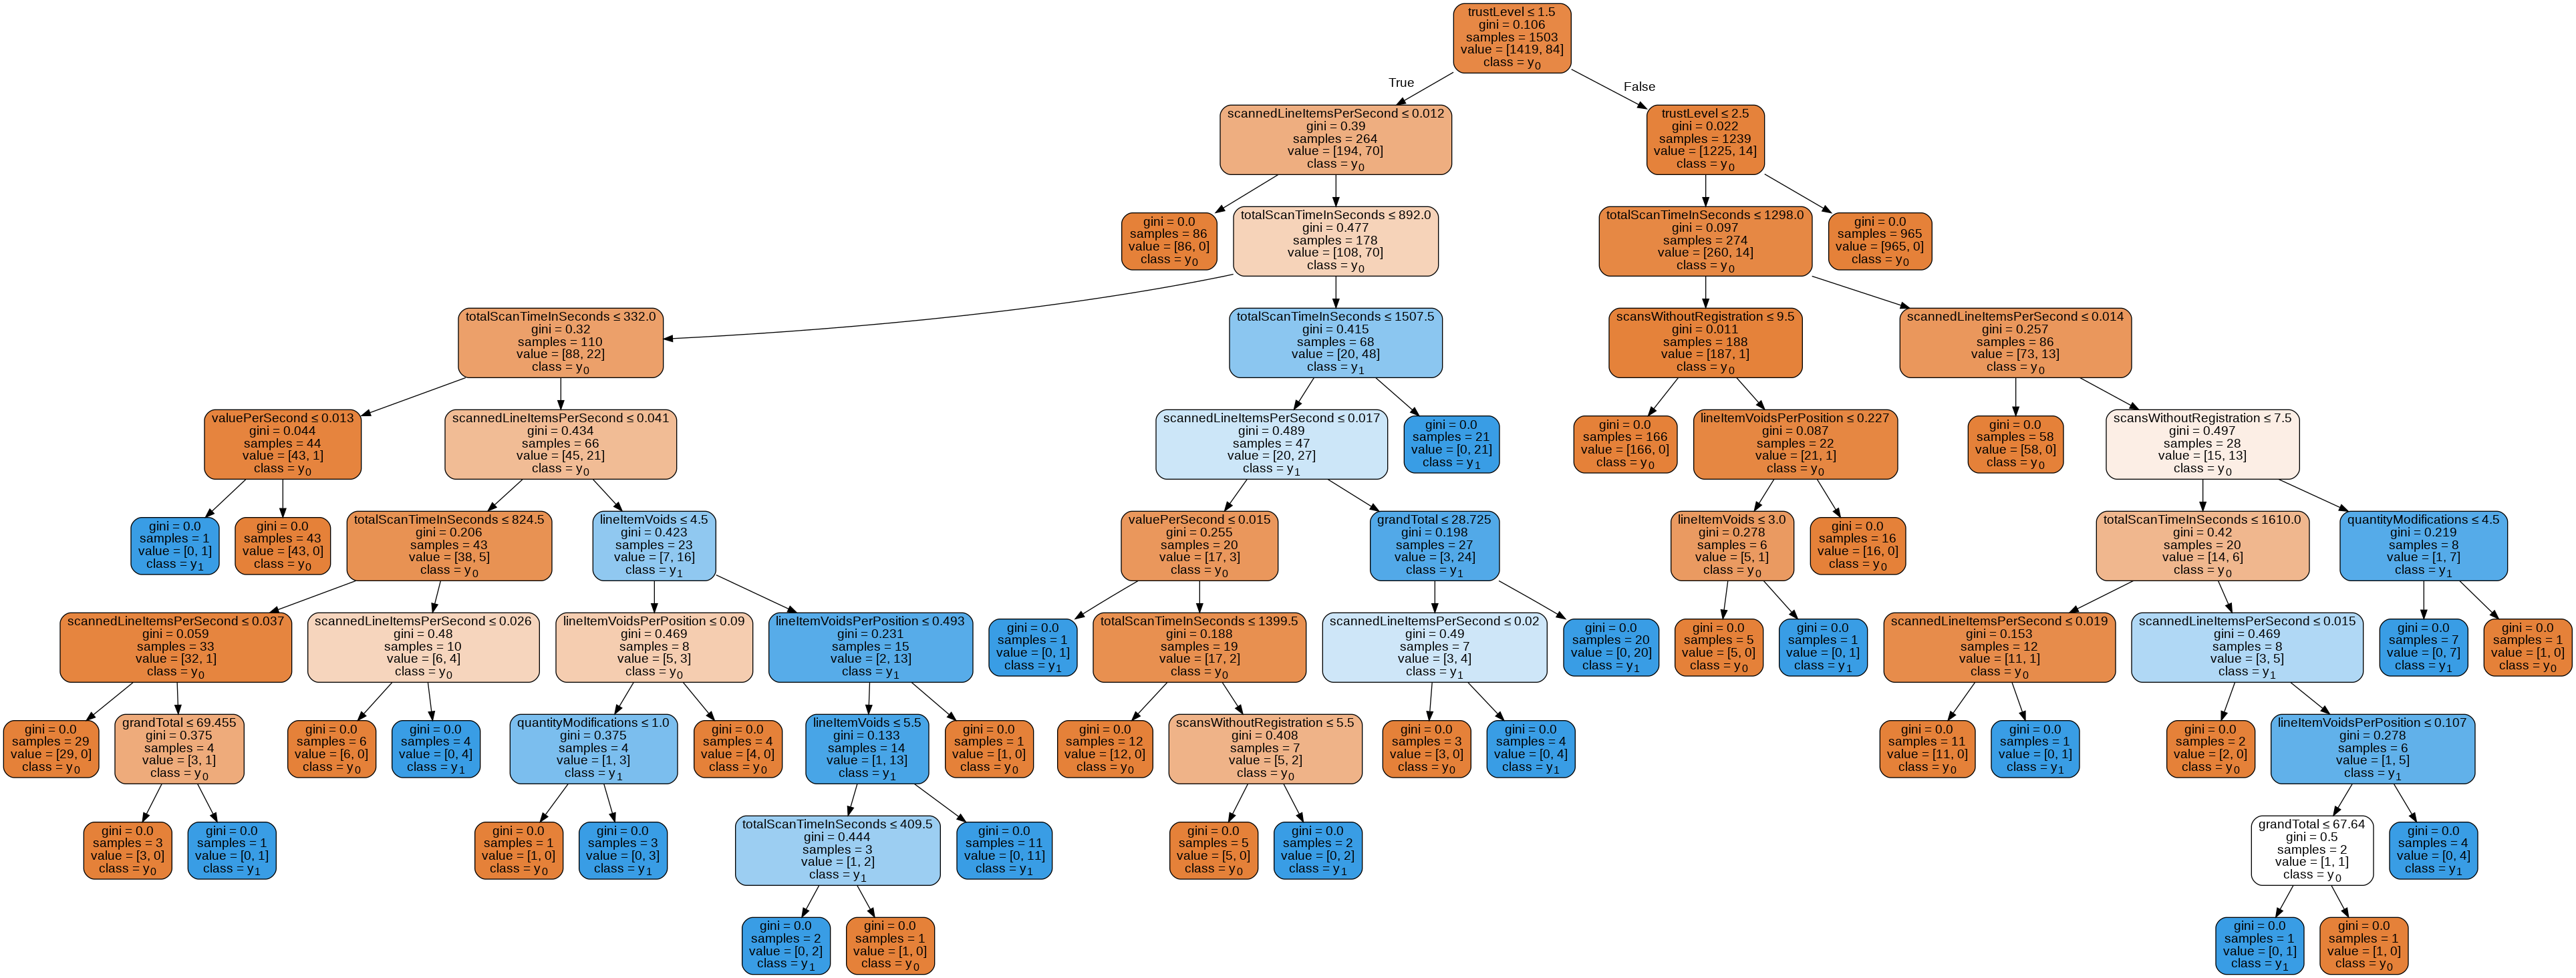

In [30]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = col,class_names=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('frauddetect.png')
Image(graph.create_png())

In [31]:
!pip install dtreeviz

     |████████████████████████████████| 61kB 4.3MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66642 sha256=42fe7bb05790624465a6319fe6e0718dfd126a70a6f6457b61d93cda091094c6
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


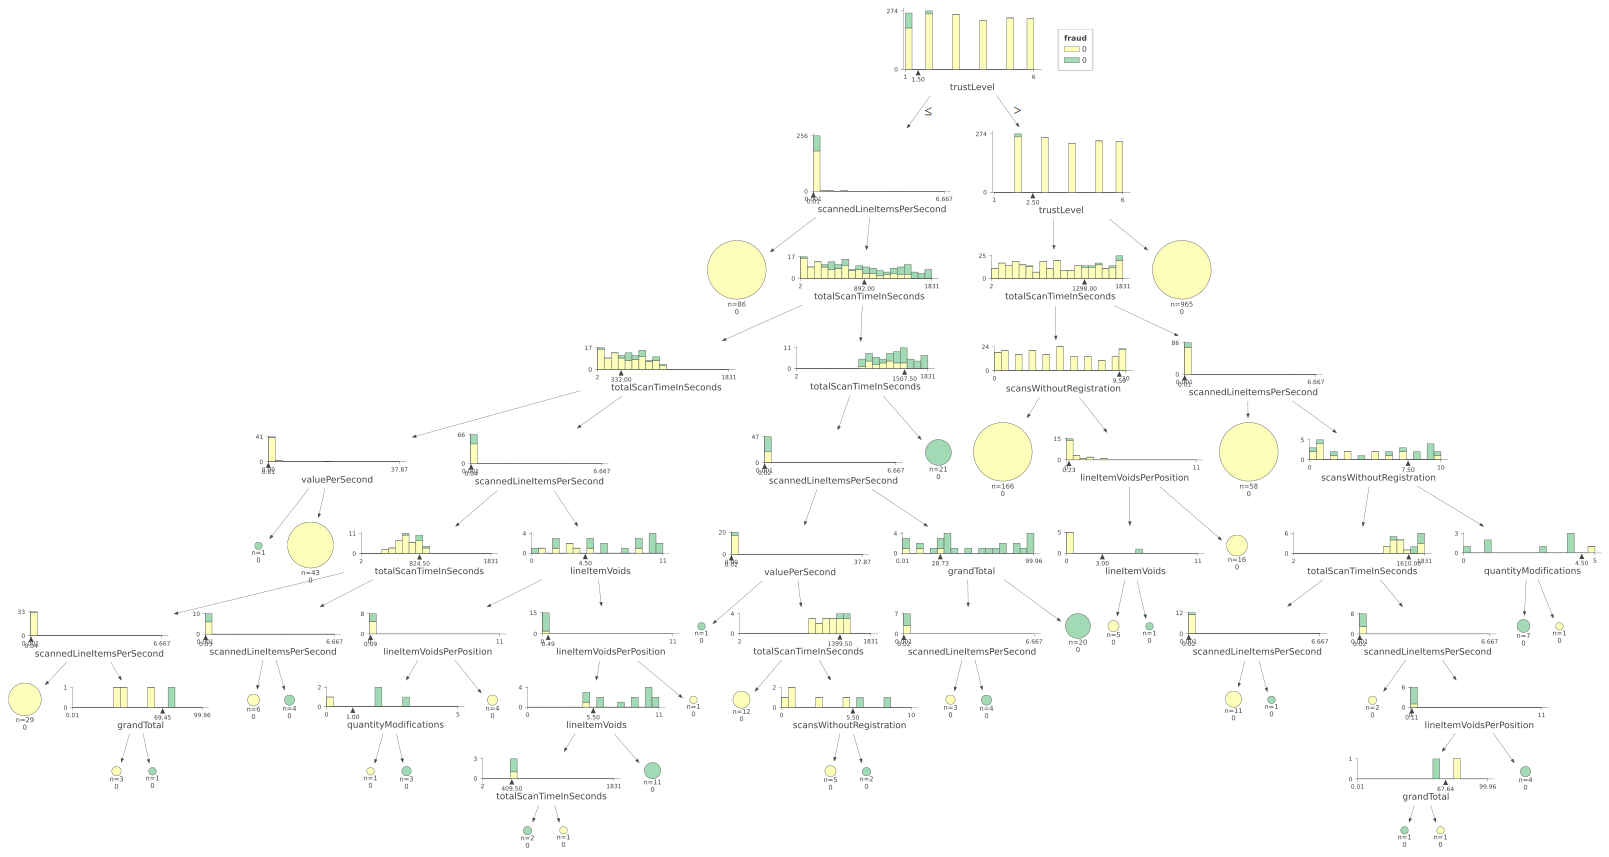

In [32]:
col = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']

from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dtree, X_train, y_train, target_name="fraud", feature_names=col, class_names=list(df.fraud))

viz


In [33]:
# Make predictions on validation dataset
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
predictions = ada.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.973404255319149
[[354   2]
 [  8  12]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       356
           1       0.86      0.60      0.71        20

    accuracy                           0.97       376
   macro avg       0.92      0.80      0.85       376
weighted avg       0.97      0.97      0.97       376



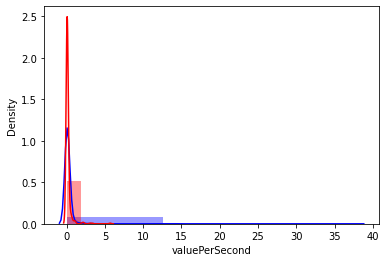

In [37]:
sb.distplot(X_train['valuePerSecond'],bins=3,color="b")
sb.distplot(X_test['valuePerSecond'],bins=3,color="r")

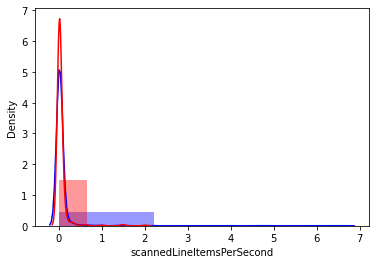

In [38]:
sb.distplot(X_train['scannedLineItemsPerSecond'],bins=3,color="b")
sb.distplot(X_test['scannedLineItemsPerSecond'],bins=3,color="r")

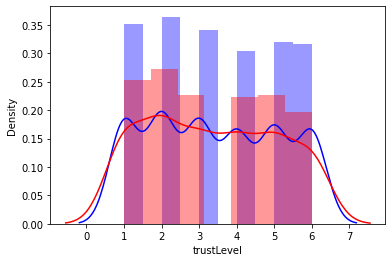

In [40]:
sb.distplot(X_train['trustLevel'],color="b")
sb.distplot(X_test['trustLevel'],color="r")

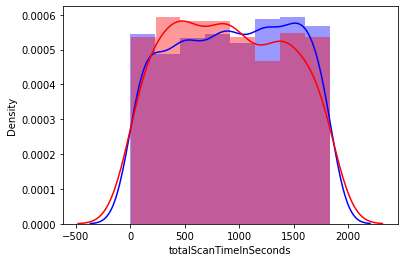

In [41]:
sb.distplot(X_train['totalScanTimeInSeconds'],bins=8,color="b")
sb.distplot(X_test['totalScanTimeInSeconds'],bins=8,color="r")

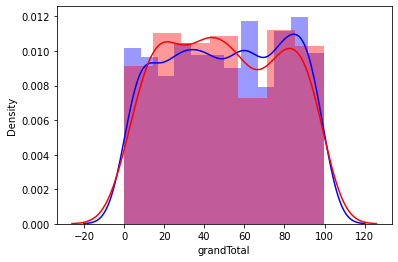

In [42]:
sb.distplot(X_train['grandTotal'],color="b")
sb.distplot(X_test['grandTotal'],color="r")

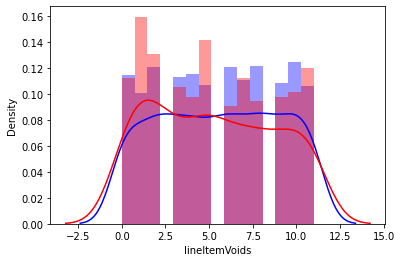

In [44]:
sb.distplot(X_train['lineItemVoids'],bins=15,color="b")
sb.distplot(X_test['lineItemVoids'],bins=15,color="r")

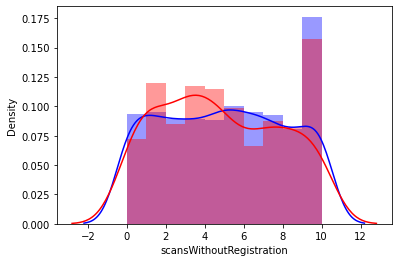

In [45]:
sb.distplot(X_train['scansWithoutRegistration'],bins=10,color="b")
sb.distplot(X_test['scansWithoutRegistration'],bins=10,color="r")

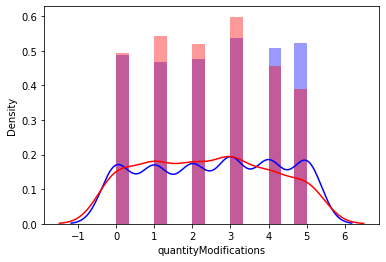

In [46]:
sb.distplot(X_train['quantityModifications'],bins=15,color="b")
sb.distplot(X_test['quantityModifications'],bins=15,color="r")

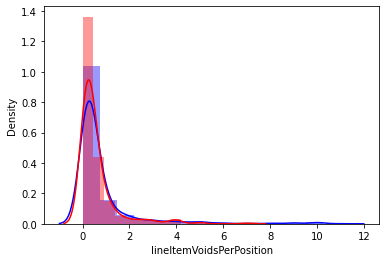

In [47]:
sb.distplot(X_train['lineItemVoidsPerPosition'],bins=15,color="b")
sb.distplot(X_test['lineItemVoidsPerPosition'],bins=15,color="r")

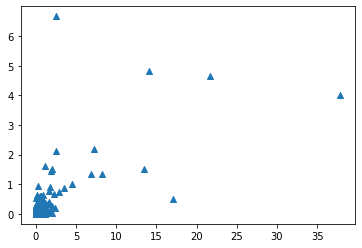

In [50]:
plt.scatter(X_train['valuePerSecond'], X_train['scannedLineItemsPerSecond'],marker='^')
plt.show()

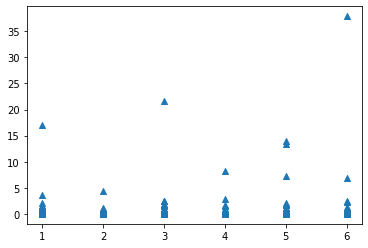

In [51]:
plt.scatter(X_train['trustLevel'], X_train['valuePerSecond'],marker='^')
plt.show()

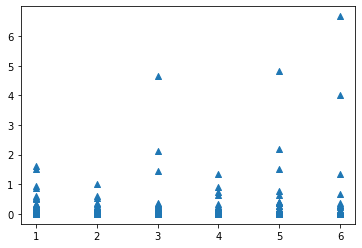

In [53]:
plt.scatter(X_train['trustLevel'], X_train['scannedLineItemsPerSecond'],marker='^')
plt.show()

#Find the best parameters for the classifier 


In [ ]:
for i in range(100, 600, 100):
  print(i)

100
200
300
400
500


In [ ]:
# Make predictions on validation dataset
for i in range(100, 600, 100):
  ada = AdaBoostClassifier(n_estimators=i)
  ada.fit(X_train, y_train)
  predictions = ada.predict(X_test)
  print(i,accuracy_score(y_test, predictions))

100 0.9813829787234043
200 0.9813829787234043
300 0.9867021276595744
400 0.9867021276595744
500 0.9867021276595744


# Predict fraud
## for single record

In [54]:
dummy = pd.DataFrame([[1,76,23.84,9,6,0,0.0261096605744125,0.0311227154046997,0.45]], columns = col )  
dummy

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,1,76,23.84,9,6,0,0.02611,0.031123,0.45


In [56]:
dummypred = ada.predict(dummy)
dummypred

array([0])

# Predict fraud
## for test.csv

In [57]:
from google.colab import files
files.upload()

Saving smalltest.csv to smalltest.csv


{'smalltest.csv': b'trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition\n4|467|88.48|4|8|4|0.0149892933618844|0.189464668094218|0.571428571428571\n3|1004|58.99|7|6|1|0.0268924302788845|0.0587549800796813|0.259259259259259\n1|162|14|4|5|4|0.00617283950617284|0.0864197530864197|4\n5|532|84.79|9|3|4|0.0263157894736842|0.15937969924812|0.642857142857143\n5|890|42.16|4|0|0|0.0213483146067416|0.0473707865168539|0.210526315789474\n5|1072|12.67|3|4|1|0.019589552238806|0.0118190298507463|0.142857142857143\n3|259|93.75|0|7|0|0.1003861003861|0.361969111969112|0\n2|1528|47.35|2|9|5|0.00981675392670157|0.030988219895288|0.133333333333333\n6|816|80.89|9|4|0|0.017156862745098|0.0991299019607843|0.642857142857143\n4|16|31.91|7|7|4|1.3125|1.994375|0.333333333333333\n3|714|94.29|8|7|0|0.0168067226890756|0.132058823529412|0.666666666666667\n5|1077|66.16|5|8|3|0.0157845868152275|0.061429

In [60]:
testset = pd.read_csv("smalltest.csv", sep="|", header=0)
predictions = ada.predict(testset)

In [59]:
dfo = pd.DataFrame(predictions)
dfo.to_csv('CHAITANYA.csv',index=False,header = None)